# A/B Testing

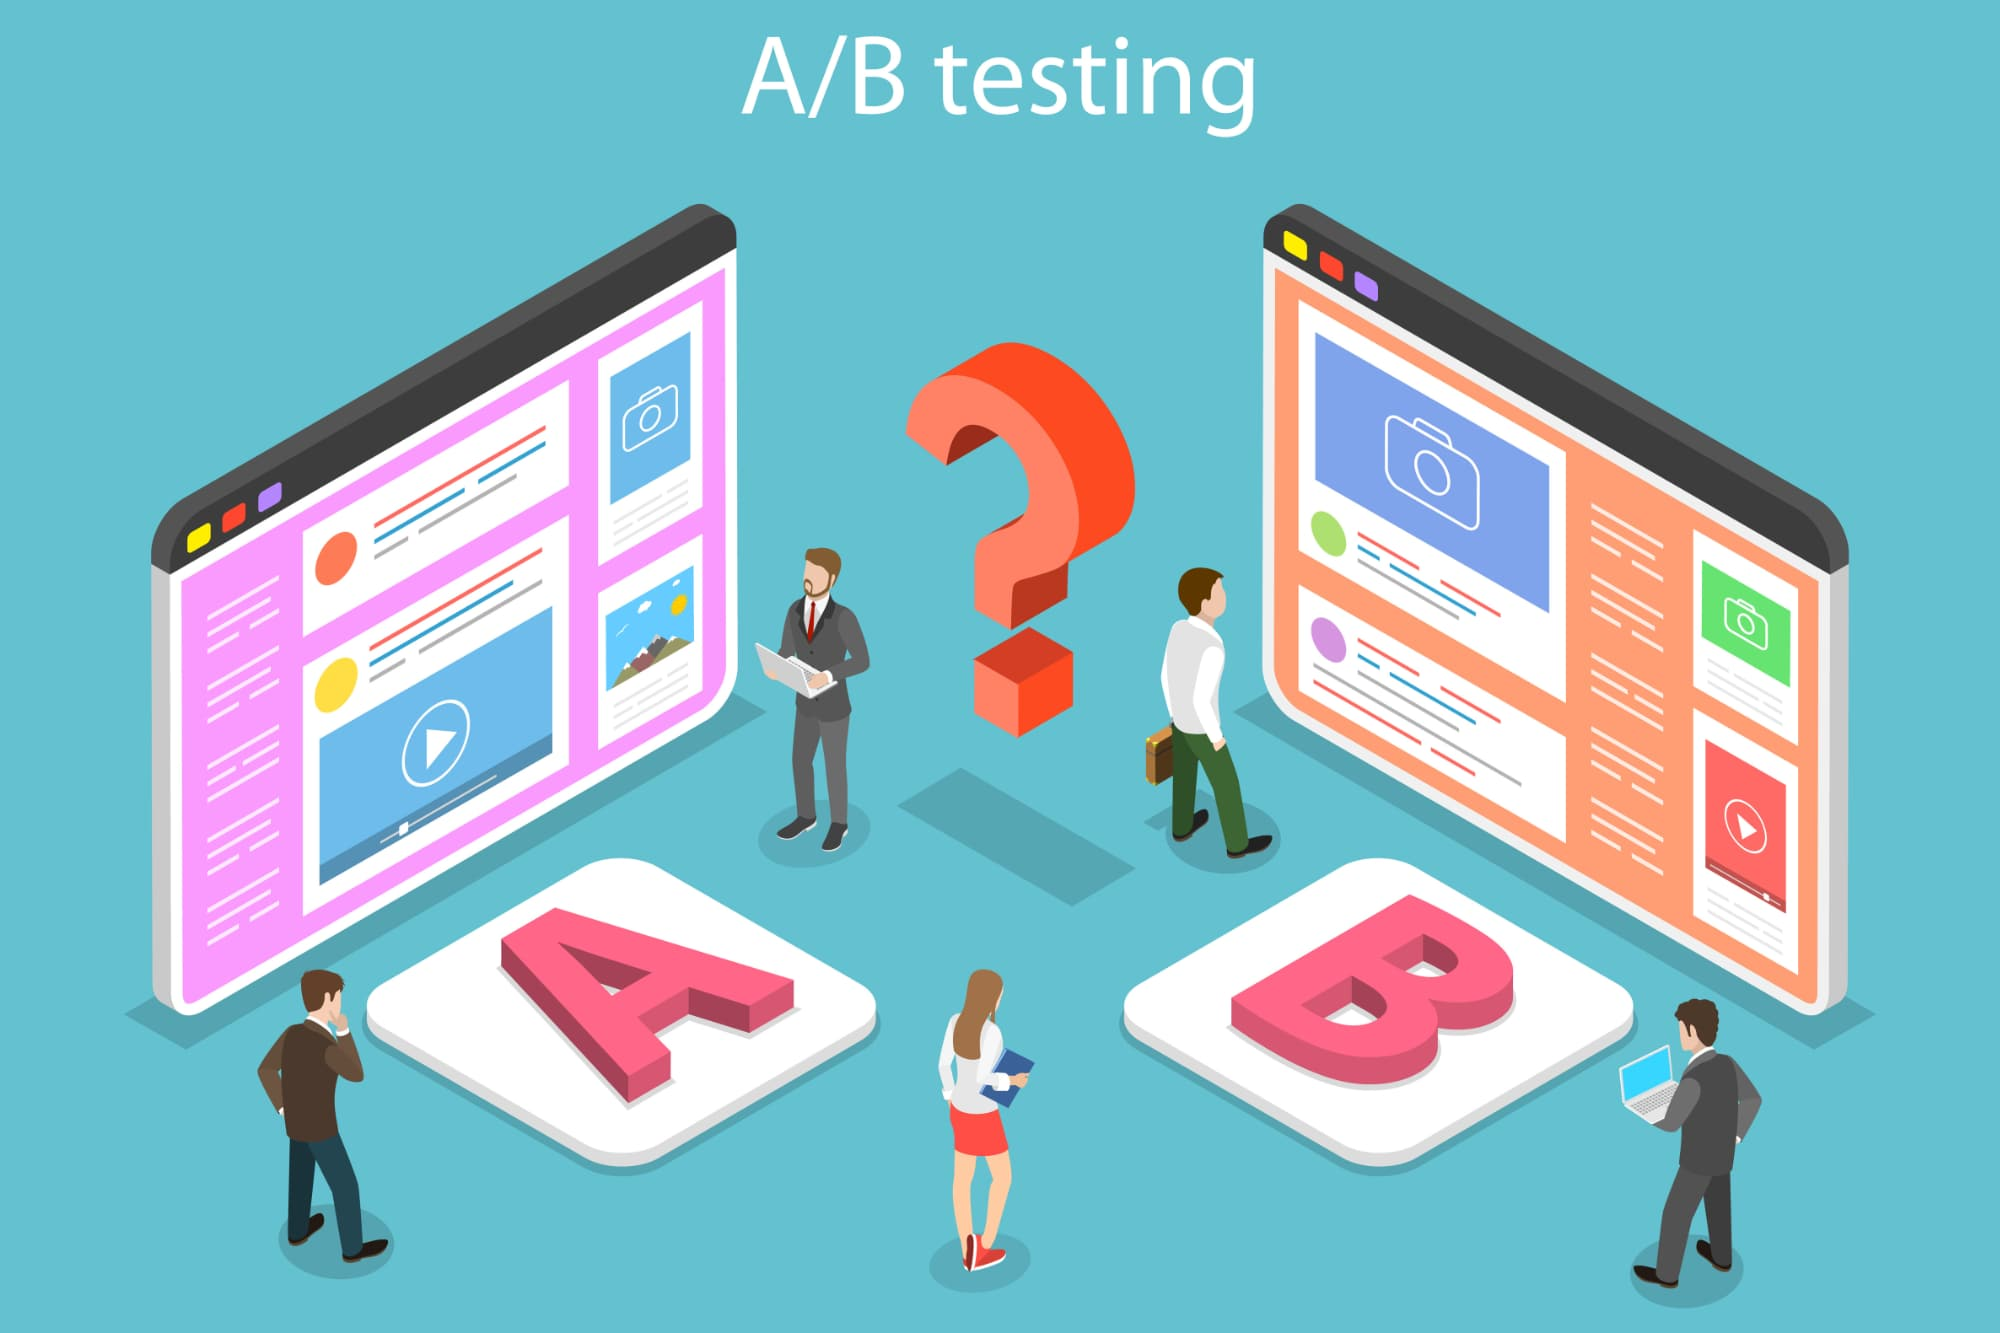

## Metodelogi

#### Prologue
Sebuah perusahaan game memberikan koin hadiah kepada penggunanya untuk membeli item dalam game. Dengan menggunakan koin virtual ini, pengguna membeli berbagai kendaraan untuk karakter mereka. Perusahaan game tidak menentukan harga untuk suatu item dan menyediakan pengguna untuk membeli item ini dengan harga yang mereka inginkan. Misalnya, untuk item bernama perisai, pengguna akan membeli perisai ini dengan membayar jumlah yang mereka inginkan. Misalnya, pengguna dapat membayar dengan 30 unit uang virtual yang diberikan kepadanya, sementara pengguna lain dapat membayar dengan 45 unit.

#### Permasalahan
Tidak adanya harga yang di sudah di tentukan oleh perusahaan untuk setiap pembelian item dapat menyebabkan ketidakpastian dalam hal penggunaan uang virtual dalam game  tersebut, setiap player game yang ingin membeli item dalam game tersebut dapat menentukan sendiri harga tiap item yang mereka beli sehingga menyebabkan tidak adanya harga yang pasti untuk setiap item.

#### Masalah yang coba di selesaikan
- apakah terdapat perbedaan harga dari tiap kategori?
- jika terdapat perbedaan harga yang di buktikan secara statistik maka berapa seharusnya harga yang di tetapkan?

#### Metode penyelesaian
- melakukan A/B testing untuk melihat perbedaan antar kelompok kategori
- melakukan penetapan harga dengan beberapa metode
- mencoba melakukan simulasi pendapatan dari harga yang sudah di tetapkan sebelumnya.

#### Definisi Variabel
- category id : merupakan variabel item game yang di sediakan oleh perusahaan game
- price       : harga yang di keluarkan oleh setiap player untuk membeli item dalam game dalam satuan uang virtual  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## mengimpor library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Blues_r')

import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## DATA CLEANING DAN DATA UNDERSTANDING

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/Pricing.csv', sep=';')
df.head()

,category_id,price
0,489756,32.117753
1,361254,30.711370
2,361254,31.572607
3,489756,34.543840
4,489756,47.205824


In [ ]:
print("jumlah baris dan kolom pada data yaitu sebanyak {} baris dan {} kolom".format(df.shape[0], df.shape[1]))

jumlah baris dan kolom pada data yaitu sebanyak 3448 baris dan 2 kolom


In [ ]:
print("daftar categori id yang ada di dataframe adalah sebagai berikut:", df.category_id.unique())

daftar categori id yang ada di dataframe adalah sebagai berikut: [489756 361254 874521 326584 675201 201436]


In [ ]:
duplicate = df.duplicated().sum()
total_data = df.shape[0]
dup_perc = (duplicate/total_data) * 100

print("jumlah kolom yang terduplikasi sebanyak {} kolom atau ({:.2f}%) dari total keseluruhan data".format(duplicate, dup_perc))

jumlah kolom yang terduplikasi sebanyak 498 kolom atau (14.44%) dari total keseluruhan data


terdapat cukup banyak data yang terduplikasi di dataframe mengingat jumlah data yang juga sedikit. namun yang perlu di ingat bahwa ini merupakan data customer dan hanya memiliki 2 feature sehingga memungkinkan munculnya data yang sama atau duplikasi data  karena bisa saja tiap player membeli item atau category id  dengan harga yang sama sehingga duplikasi data tidak perlu di hapus.



In [ ]:
print("missing value atau nilai yang hilang pada masing-masing variabel berjumlah:\n",df.isnull().sum())

missing value atau nilai yang hilang pada masing-masing variabel berjumlah:
 category_id    0
price          0
dtype: int64


tidak terdapat missing value atau nilai yang hilang pada data.

#### RINGKASAN STATISTIK DAN OUTLIER

In [ ]:
print("ringkasan statistik yang terdapat pada data sebelum penghapusan outlier sebagai berikut:\n\n"
, df.describe([0.01, 0.05, 0.50, 0.95, 0.99 ]).T)

ringkasan statistik yang terdapat pada data sebelum penghapusan outlier sebagai berikut:

               count           mean            std       min        1%  \
category_id  3448.0  542415.171984  192805.689911  201436.0  201436.0   
price        3448.0    3254.475770   25235.799009      10.0      30.0   

                   5%            50%            95%            99%  \
category_id  326584.0  489756.000000  874521.000000  874521.000000   
price            30.0      34.798544      92.978218  201436.464204   

                       max  
category_id  874521.000000  
price        201436.991255  


dari ringkasan statistik di atas dapat di lihat bahwa adanya indikasi nilai pencilan(outlier) baik itu nilai yang terlalu kecil dan nilai yang terlalu ekstrim terutama di variabel Price

In [ ]:
##mencari IQR(outlier) harga
Q1 = df['price'].quantile(0.05)
Q3 = df['price'].quantile(0.95)
IQR = Q3 - Q1
outliers = df[(df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR))]
print("jumlah outlier di column price sebanyak:", len(outliers))

jumlah outlier di column price sebanyak: 77


In [ ]:
#menghapus outlier
df = df[~((df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR)))]

Nilai Q1 dan Q3 yang di gunakan untuk mencari nilai IQR di buat lebih tolerant terhadap nilai outlier karena ukuran data yang tidak terlalu besar sehingga di gunakan quantile o.o5 sebagai Quartile 1 dan quantile 0.95 sebagai Quartile 3. hal ini bertujuan agar tidak banyak jumlah data yang terdeteksi sebagai outlier yang bis mengurangi jumlah data secara signifikan di bandingkan dengan penggunaan 0.25 dan 0.75 sebagai Quartile 1 dan Quartile 3.

In [ ]:
print("ringkasan statistik yang terdapat pada data setelah penghapusan outlier sebagai berikut:\n\n"
, df.describe([0.01, 0.05, 0.50, 0.95, 0.99 ]).T)

ringkasan statistik yang terdapat pada data setelah penghapusan outlier sebagai berikut:

               count           mean            std       min        1%  \
category_id  3371.0  541235.913082  192847.981205  201436.0  201436.0   
price        3371.0      40.398652      18.205540      10.0      30.0   

                   5%           50%            95%            99%  \
category_id  326584.0  489756.00000  874521.000000  874521.000000   
price            30.0      34.74272      73.680507     126.786865   

                       max  
category_id  874521.000000  
price           187.445135  


##### SKEWNESS DAN KURTOSIS

In [ ]:
import scipy.stats
from scipy.stats import skew

skewness = skew(df['price'])
print("nilai skewness dari variabel price sebesar", skewness)

nilai skewness dari variabel price sebesar 3.729729594365392


dari pengamatan nilai skewness dapat di lihat bahwa variabel price memiliki skewness positif, sebaran data cenderung berada di nilai yang lebih kecil dan ekor distribusi berada di sebelah kanan.

In [ ]:
from scipy.stats import kurtosis

kurt = kurtosis(df['price'], fisher=True)
print("nilai kurtosis dari variabel price sebesar", kurt)

nilai kurtosis dari variabel price sebesar 17.54413026782888


dari pengamatan nilai kurtosis dapat di simpulkan bahwa bentuk disrtibusi sangat curam dan tebal yang menandakan besarnya perbedaan harga pada variable price.

#### VISUALISASI DATA

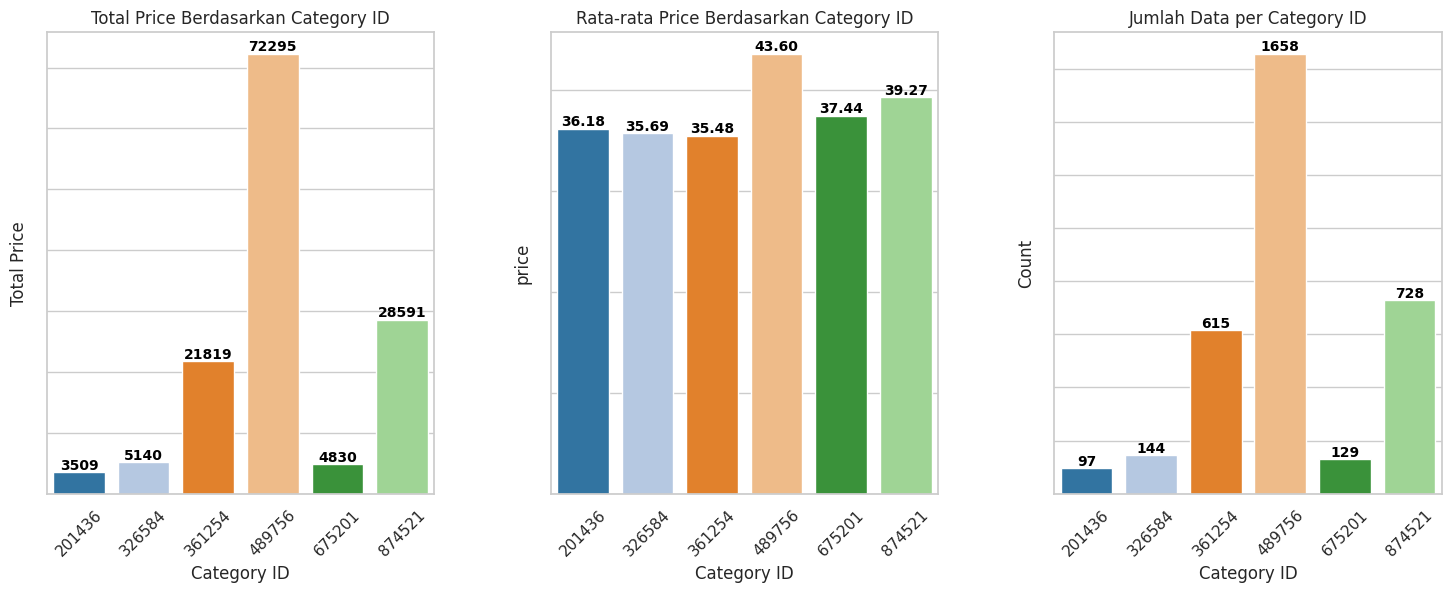

In [ ]:
sns.set_palette('tab20')

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), gridspec_kw={'wspace': 0.3})

# Plot pertama (total price berdasarkan category id)
ax1 = sns.barplot(data=df, x='category_id', y='price', ci=None, estimator=sum, ax=ax1)
ax1.set_xlabel('Category ID')
ax1.set_ylabel('Total Price')
ax1.set_title('Total Price Berdasarkan Category ID')
ax1.grid(True, axis='y')
ax1.set_yticklabels([])
ax1.tick_params(axis='x', rotation=45)

for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Plot kedua (rata-rata price berdasarkan category id)
ax2 = sns.barplot(data=df, x='category_id', y='price', ci=None, estimator='mean', ax=ax2)
ax2.set_xlabel('Category ID')
ax2.set_title('Rata-rata Price Berdasarkan Category ID')
ax2.grid(True, axis='y')
ax2.set_yticklabels([])
ax2.tick_params(axis='x', rotation=45)

for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Plot ketiga (countplot untuk Category ID)
ax3 = sns.countplot(data=df, x='category_id', ax=ax3)
ax3.set_xlabel('Category ID')
ax3.set_ylabel('Count')
ax3.set_title('Jumlah Data per Category ID')
ax3.grid(True, axis='y')
ax3.tick_params(axis='x', rotation=45)

# Hilangkan angka pada sumbu y (Count)
ax3.set_yticklabels([])

# Atur label pada countplot
for p in ax3.patches:
    height = p.get_height()
    ax3.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.tight_layout()

plt.show()





category id 489756 memiliki total penjualan terbanyak dan dengan rata-rata harga tertinggi di bandingkan dengan category id lain-nya. hal ini mengindikasikan bahwa category id 489756 merupakan item yang paling di gemari dan para player bersedia untuk membayar item tersebut dengan lebih mahal di bandingkan item lain nya.

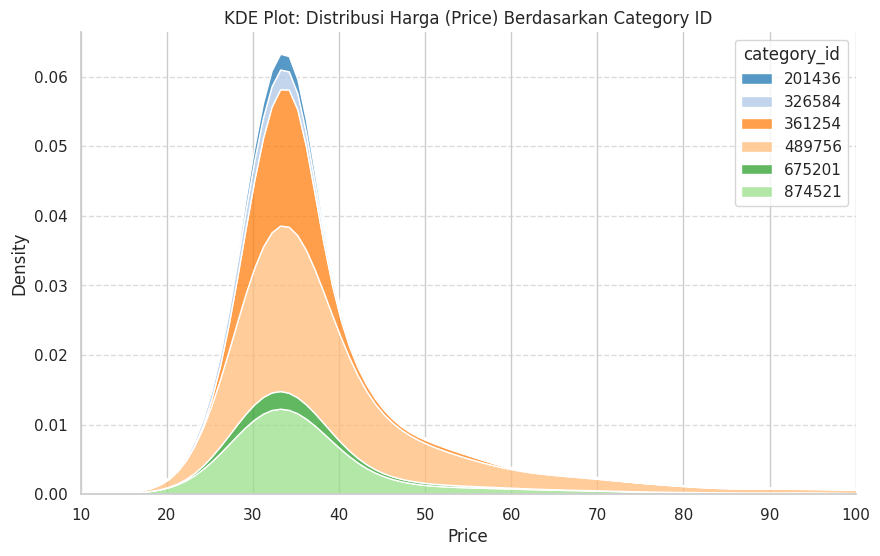

In [ ]:

category_palette = sns.color_palette('tab20', n_colors=len(df['category_id'].unique()))

plt.figure(figsize=(10, 6))
ax = sns.kdeplot(data=df, x='price', hue='category_id', multiple='stack', palette=category_palette)

plt.title('KDE Plot: Distribusi Harga (Price) Berdasarkan Category ID')

plt.xlabel('Price')
plt.ylabel('Density')

plt.xlim(10,100)
sns.despine()

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


kde plot di atas menggambarkan sebaran harga dari masing-masing category id. category id 489756, 675201 dan 874521 memiliki harga yang lebih tinggi jika di bandingkan dengan category lain, hal ini di buktikan dengan density yang rendah di median data. sedangkan category id 201436, 326584 dan 361254 cenderung memiliki sebaran harga yang terpusat di rentang harga 20-40 yang di lihat dari density.

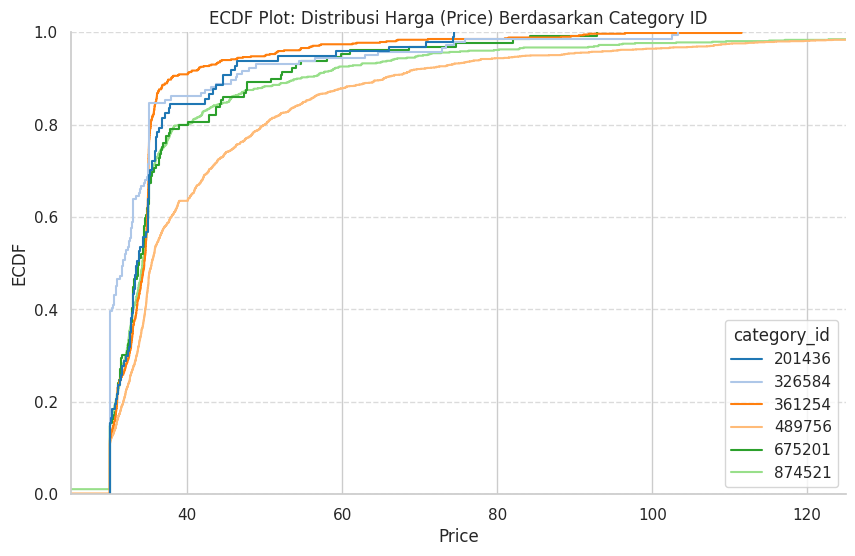

In [ ]:


# Atur palet warna yang berbeda untuk setiap kategori
category_palette = sns.color_palette('tab20', n_colors=len(df['category_id'].unique()))

plt.figure(figsize=(10, 6))
sns.ecdfplot(data=df, x='price', hue='category_id', palette=category_palette)

plt.title('ECDF Plot: Distribusi Harga (Price) Berdasarkan Category ID')

plt.xlabel('Price')
plt.ylabel('ECDF')

plt.xlim(25,125)
sns.despine()

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


Dari ECDF plot di atas semakin menjelaskan bahwa category id 489756 dan 874521 memiliki proporsi dan range harga yang jauh lebih tinggi di bandingkan dengan category id lain. Ketika kurva ECDF naik lebih cepat, itu menunjukkan bahwa data cenderung lebih padat di sekitar nilai tersebut. ECDF plot membantu memberikan gambaran tentang sebaran data dan berapa banyak data yang berada di bawah atau di atas nilai tertentu.

#### VISUAL INSIGHT
- Category id 489756 merupakan category paling di minati berdasarkan jumlah transaksi di ikuti oleh category id 361254 dan 874521.
- Category id 489756 merupakan category dengan penghasilan paling tinggi bagi perusahaan berdasarkan jumlah uang virtual yang di keluarkan oleh player di ikuti oleh category id 874521 dan 361254.
- berdasarkan plot kde dan ecdf, category id 874521 dan 489756 cenderung di beli dengan harga yang lebih mahal oleh para player.
- category id 201436, 326584 dan 361254 memiliki sebaran harga yang terpusat di range harga 20 hingga 50 usd dengan titik pusat sebaran ada di harga 35 unit uang virtual.

## A/B TESTING

A/B testing adalah metode yang digunakan dalam ilmu data dan pemasaran untuk membandingkan dua variasi dari suatu elemen (misalnya halaman web, iklan, produk, atau fitur) dengan tujuan untuk mengetahui variasi mana yang memberikan hasil terbaik dalam mencapai tujuan tertentu.


#### LANGKAH-LANGKAH A/B TESTING

##### PENGECEKAN ASUMSI DATA
- Cek Distribusi Data.
- jika Data Berdistribusi normal, di lanjutkan dengan memerikasa homogenitas data.

##### LANGKAH-LANGKAH ANALISIS
- menggunakan uji Shapiro-Wilk(Shapiro-Wilk test) untuk menguji normalitas data.
- jika data berdistribusi normal(parametrik), maka akan di lakukan uji levene guna menguji homogenitas varians.
- jika data berdistribusi normal(parametrik) dan homogenitas varians terpenuhi, gunakan uji T(T-test).
-jika data berdistribusi normal(parametrik) tetapi homogenitas varians tidak terpenuhi, gunakan uji T-Welch's(Welch's T-test).
-jika data tidak berdistribusi normal(non-parametrik), maka gunakan uji Mann Whitney U(Mann-Whitney U test).

##### UJI SHAPIRO-WILK
Uji Shapiro-Wilk adalah sebuah metode statistik yang digunakan untuk menguji apakah suatu sampel data berasal dari populasi dengan distribusi normal atau tidak. Uji ini sangat berguna dalam analisis statistik karena banyak metode statistik yang membutuhkan asumsi tentang distribusi normal dari data.

Fungsi dari Uji Shapiro-Wilk adalah untuk menguji hipotesis nol (H0) dan hipotesis alternatif (H1) sebagai berikut:

- H0 (Hipotesis Nol): Sampel data berasal dari populasi dengan distribusi normal.
- H1 (Hipotesis Alternatif): Sampel data tidak berasal dari populasi dengan distribusi normal.

In [ ]:
from scipy.stats import shapiro

for x in df['category_id'].unique() :
  test_statistic, pvalue = shapiro(df.loc[df['category_id']== x, 'price'])
  if (pvalue <0.05) :
    print(f'category id {x}:')
    print('hasil test statistic = %.4f , nilai p-value = %.2f' %
          (test_statistic, pvalue), "H0 di tolak")
  else :
    print(f'category id {x}:')
    print('hasil test statistic = %.4f , nilai p-value = %.2f' %
          (test_statistic, pvalue), "H0 di terima")

category id 489756:
hasil test statistic = 0.6328 , nilai p-value = 0.00 H0 di tolak
category id 361254:
hasil test statistic = 0.4757 , nilai p-value = 0.00 H0 di tolak
category id 874521:
hasil test statistic = 0.5116 , nilai p-value = 0.00 H0 di tolak
category id 326584:
hasil test statistic = 0.5026 , nilai p-value = 0.00 H0 di tolak
category id 675201:
hasil test statistic = 0.6382 , nilai p-value = 0.00 H0 di tolak
category id 201436:
hasil test statistic = 0.6190 , nilai p-value = 0.00 H0 di tolak


dari test Shapiro-wilk yang telah di lakukan, dengan hasil semua category id menolak H0 yang berarti semua category id berasal data tidak berasal dari populasi dengan distribusi normal.

Dikarenakan data tidak berdistribusi normal maka tahap selanjutnya adalah langsung melakukan hypotesis testing menggunakan uji Mann Whitney U(Mann-Whitney U test).

#####  UJI MANN-WHITNEY U(HYPOTESIS TESTTING)
Uji Mann-Whitney U, juga dikenal sebagai Uji Wilcoxon Rank-Sum, adalah metode statistik non-parametrik yang digunakan untuk membandingkan dua sampel independen untuk menentukan apakah median kedua sampel berbeda secara signifikan. Uji ini cocok digunakan ketika data tidak mengikuti distribusi normal atau jika asumsi homogenitas varians tidak terpenuhi.

Tujuan dari Uji Mann-Whitney U adalah untuk menguji hipotesis nol (H0) dan hipotesis alternatif (H1) sebagai berikut:

- Hipotesis nol (H0): Tidak ada perbedaan yang signifikan antara dua kelompok yang sedang dibandingkan.

- Hipotesis alternatif (H1): Ada perbedaan yang signifikan antara dua kelompok yang sedang dibandingkan.

In [ ]:
#melakukan semua kemungkinan kombinasi antar 2 category id menmnggunakan itertools

import itertools

i = []
for x in itertools.combinations(df['category_id'].unique(),2) :
  i.append(x)

In [ ]:
# melakukan hypotersis testing

a = []
for x in i :
  (test_statistics, pvalue) = scipy.stats.mannwhitneyu(df.loc[df['category_id'] == x[0], 'price'],
                                                            df.loc[df['category_id'] == x[1], 'price'])
  if (pvalue < 0.05) :
    a.append((x[0], x[1], "H0 ditolak"))
    print("\nkombinasi categori id {0} dan category id {1}".format(x[0], x[1]))
    print('hasil test statistics = %.4f, dengan nilai p-value = %.2f' % (test_statistic, pvalue), "H0 ditolak")
  else :
    a.append((x[0], x[1], "H0 tidak ditolak"))
    print("\nkombninasi category id {0} - category id {1}".format(x[0], x[1]))
    print('hasil test statistics = %.4f, dengan nilai p-value = %.2f' % (test_statistic, pvalue), "H0 tidak di tolak")


kombinasi categori id 489756 dan category id 361254
hasil test statistics = 0.6190, dengan nilai p-value = 0.00 H0 ditolak

kombinasi categori id 489756 dan category id 874521
hasil test statistics = 0.6190, dengan nilai p-value = 0.00 H0 ditolak

kombinasi categori id 489756 dan category id 326584
hasil test statistics = 0.6190, dengan nilai p-value = 0.00 H0 ditolak

kombinasi categori id 489756 dan category id 675201
hasil test statistics = 0.6190, dengan nilai p-value = 0.00 H0 ditolak

kombinasi categori id 489756 dan category id 201436
hasil test statistics = 0.6190, dengan nilai p-value = 0.00 H0 ditolak

kombninasi category id 361254 - category id 874521
hasil test statistics = 0.6190, dengan nilai p-value = 0.18 H0 tidak di tolak

kombinasi categori id 361254 dan category id 326584
hasil test statistics = 0.6190, dengan nilai p-value = 0.00 H0 ditolak

kombninasi category id 361254 - category id 675201
hasil test statistics = 0.6190, dengan nilai p-value = 0.74 H0 tidak di to

In [ ]:
#membuat dataframe baru untuk memudahkan membaca hasil hypotesis testing

df1 = pd.DataFrame()
df1['category A'] = [x[0] for x in a]
df1['category B'] = [x[1] for x in a]
df1['hasil hipotesis'] = [x[2] for x in a]
df1

,category A,category B,hasil hipotesis
0,489756,361254,H0 ditolak
1,489756,874521,H0 ditolak
2,489756,326584,H0 ditolak
3,489756,675201,H0 ditolak
4,489756,201436,H0 ditolak
5,361254,874521,H0 tidak ditolak
6,361254,326584,H0 ditolak
7,361254,675201,H0 tidak ditolak
8,361254,201436,H0 tidak ditolak
9,874521,326584,H0 ditolak


#### **HASIL HYPOTESIS TESTING**

dataframe di atas merupakan hasil dari hypotesis testing menggunakan mann-whitney u test dimana terdapat 6 kelompok kombinasi category id yang tidak menolak H0, artinya 6 kelompok ini tidak memiliki perbedaan yang signifikan secara statistik.

sementara itu terdapat 9 kelompok kombinasi category id yang menolak H0, artinya ke 9 kelompok ini memiliki perbedaan yang signifikan secara statistik.

**6 kelompok kombinasi category id yang tidak memiliki perbedaan secara signifikan ini akan di ambil nilai rata-ratanya untuk menentukan rekomendasi harga yang dapat di terapkan oleh perusahaan dalam menjual item di dalam game.**

6 kelompok kombinasi category id yang tidak memiliki perbedaan secara signifikan terdiri dari category id 361254, 874521, 201446 dan 675201

#### PENENTUAN HARGA

In [ ]:
# melihat rata-rata harga dari kelompok yang tidak memiliki perbedaan secara statistik

h1 = [361254, 874521, 201436, 675201]

jumlah = 0
for x in h1 :
  jumlah += df.loc[df['category_id'] == x, 'price'].mean()

harga =  jumlah/4

print("rata-rata harga dari kelompok yang tidak memiliki perbedaan secara statistik adalah sebesar %.2f" % harga)

rata-rata harga dari kelompok yang tidak memiliki perbedaan secara statistik adalah sebesar 37.09


setelah melakukan perhitungan rata-rata dari harga kelompok yang memiliki perbedaan secara statistik maka di dapatkan harga rata-rata sebesar 37.09

namun pada penyelesaian masalah ini juga akan di gunakan pendekatan lain selain menggunakan rata-rata kelompok. permasalahan pada penetapan harga menggunakan rata-rata di anggap kaku karena hanya menetapkan 1 harga saja sebagai acuan maka dari itu perlu melakukan pendekatan lain.  pendekatan yang akan di gunakan adalah metode FLEXIBLE PRICING

##### FLEXIBLE PRICING METHOD
Flexible pricing method adalah pendekatan dalam menentukan harga suatu produk atau layanan di mana perusahaan menetapkan rentang harga yang luas atau fleksibel untuk produk atau layanan tersebut, daripada harga tetap yang kaku.

Metode yang akan di gunakan dalam flexible pricing method adalah dengan memanfaatkan tingkat kepercayaan pada rata-rata kelompok(t-confidence interval for the mean) dengan memanfaatkan modul DescrStatsW dari library statsmodel.

tingkat kepercayaan yang akan di gunakan adalah 0.05

In [ ]:
import statsmodels.stats.api as sm

i = []
for x in h1 :
  for a in df.loc[df['category_id'] == x, 'price'] :
    i.append(a)

ci_lower, ci_upper = sm.DescrStatsW(i).tconfint_mean()
print(f'rentang harga berdasarkan interval kepercayaan 0.05 adalah : {ci_lower:.2f}, {ci_upper:.2f}')



rentang harga berdasarkan interval kepercayaan 0.05 adalah : 36.71, 38.18


Setelah melakukan metode flexible pricing dengan memanfaatkan tingkat kepercayaan 0.05 persen terhadap rata-rata harga maka di dapatkan range harga dari 36.71 sampai 38.18.


##### SIMULASI PENDAPATAN DARI FLEXIBLE PRICING
setelah melakukan pendekatan flexible pricing maka langkah selanjutnya adalah mencoba melakukan simulasi perhitungan pendapatan dari data yang sudah ada.

perhitungan pendapatan akan menggunakan hasil dari flexible pricing yang sudah di lakukan.

In [ ]:
# membuat fungsi simulasi pendapatan
def simulasi_pendapatan(harga) :
  a = len(df[df['price'] > harga])
  hasil = a*harga
  return hasil

penerapan pada harga minimum dari flexible pricing:

In [ ]:
harga = 36.71
pendapatan = simulasi_pendapatan(harga)
print(f'Pendapatan yang akan di dapatkan dari harga {harga:.2f} adalah sebesar {pendapatan:.2f}')

Pendapatan yang akan di dapatkan dari harga 36.71 adalah sebesar 38472.08


penerapan pada mean dari flexible pricing :

In [ ]:
harga = 37.44
pendapatan = simulasi_pendapatan(harga)
print(f'Pendapatan yang akan di dapatkan dari harga {harga:.2f} adalah sebesar {pendapatan:.2f}')

Pendapatan yang akan di dapatkan dari harga 37.44 adalah sebesar 36953.28


penerapan pada harga maximum dari flexible pricing :

In [ ]:
harga = 38.18
pendapatan = simulasi_pendapatan(harga)
print(f'Pendapatan yang akan di dapatkan dari harga {harga:.2f} adalah sebesar {pendapatan:.2f}')

Pendapatan yang akan di dapatkan dari harga 38.18 adalah sebesar 35354.68


## INSIGHT

- item 489756 merupakan item paling di minati berdasarkan jumlah transaksi, dengan pengahasil total penjualan uang virtual terbesar serta memiliki rata-rata harga yang lebih tinggi dari item lain.
- para pemain game cenderung membeli item 489756, 675201 dan 874521 dengan harga yang lebih tinggi di banding item game lain
- penerapan harga berdasarkan pendekatan flexibel pricing dengan interval kepercayaan  0.05 berada di range 36.71 sampai 38.18

## SARAN DAN REKOMENDASI
- penerapan harga dengan metode flexible pricing dapat di aplikasikan tehadap penentuan harga item yang ada di dalam game.
- penerapan harga bisa di dasari dengan tingkat popularitas item yang ada dalam game. sebagai contoh, berdasarkan barplot yang sudah di buat sebelumnya di ketahui item 489756 merupakan item yang sangat di minati oleh player dan dan rata-rata harga yang di berikan oleh player terhadap  item tersebut lebih tinggi dari item lainya maka item 489756 bisa di jual dengan harga maksimal dari flexible pricing method yaitu sebesar 38.18.
- item game yang memiliki peminat yang cukup tinggi lainya adalah item 874521 dan 361254, namun berdasarkan barplot yang sudah di buat sebelumnya item 361254 memiliki rata-rata harga yang lebih rendah dari item lainya sehingga hanya iten 874521 saja yang akan di terapkan harga dari mean atau rata-rata interval kepercayaan yaitu 37.44.
- Item dengan tingkat peminat yang rendah seperti item 201436, 326584 dan 675201 dapat di tetapkan harga minimum dari flexible pricing method sebesar 36.71, dengan penerapan harga minimum di harapkan para player dapat membeli lebih banyak item ini kedepanya.

### REKOMENDASI HARGA
- item 489756 : 38.18
- item 874521 : 37.44
- item 201436 : 36.71
- item 326584 : 36.71
- item 675201 : 36.71
- item 361254 : 36.71




## TERIMA KASIH